Author           : Namita Rana

### Project Name    

Detection of Pneumonia from Chest X-Ray Images using ConvolutionalNeural Network and Transfer Learning.
  
  
  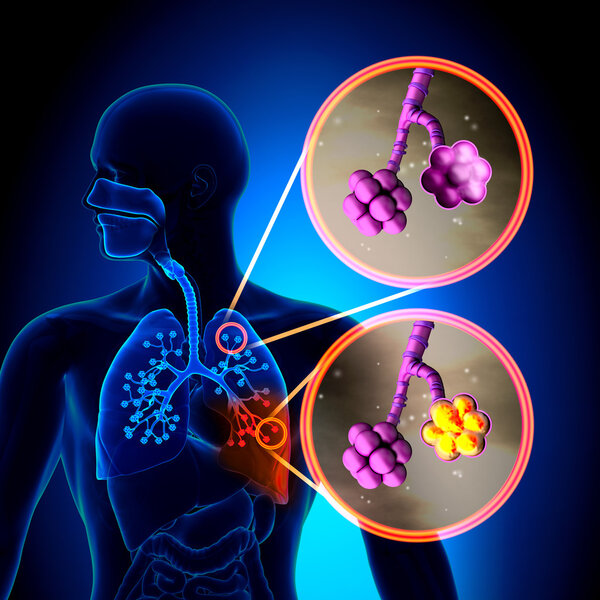
  
  
  
  
  
  
  
  
  
  
#### Dataset Details

Dataset Name            : Chest X-Ray Images (Pneumonia)

Number of Class         : 2

Number/Size of Images   : Total      : 5863 
                          Training   : 5216 
                          Validation : 16  
            

# Business Problem: 
Building a model that can classify whether a given patient has pneumonia, given a chest x-ray image.

Stakeholer: Imaging labs/ Hospitals.

Business Questions: How can a successful model help save medical professionals time, money and promote better accuracy in patient diagnosis.

## Background:


Pneumonia is an infection that inflames your lungs' air sacs (alveoli). The air sacs may fill up with fluid or pus, causing symptoms such as a cough, fever, chills and trouble breathing. Bacteria and viruses are the main causes of pneumonia. Pneumonia-causing germs can settle in the alveoli and multiply after a person breathes them in. Pneumonia can be contagious. The bacteria and viruses that cause pneumonia are usually inhaled.
Commonly affected are Infants, children and people over 65 years in age.



Chest X-rays are used for detecting the Pneumonia infection and to locate the infected area in the lungs. So, To detect the the pneumonia radiologist have to observe the chest xray and he/she has to update the doctor correctly. The main objective of this model is to identify if the person has Pneumonia or not with high accuracy so that the person can get treatment as soon as possible. Deep Learning models which are trained correctly by using good datasets can be helpful for doctors. 

To train the model for detecting whether the person has pneumonia or not, A Convolutional Neural Network(CNN) is used. The CNN can train the images of chest xrays and then it can predict with high accuracy.



## Data Structure, Selection & Transformation:

The dataset we recieved in Kaggle is actually distributed into 3 folders (train, test, val) and individually, they contain subfolders for each image category (Pneumonia/Normal).

There are a total of 5,863 X-Ray images (in JPEG Format) distributed into 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

## Methods
## Cleaning and Feature Engineering


This project uses data cleaning and feature engineering to also addressed the class imbalance between classes we have used Data Augmentation.


Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.


In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations. Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.



### Models Development
We have implemented versions of CNN's with different parameters,dense layers,dropout layers to see how results varies with each change in the parameters.
Results
Our model,CNN came back with a confusion matrix that produced a 91% accuracy score and a 99% recall score. For our purposes, we were looking to minimize recall as we want to reduce the amount of False positives (False negatives: Patients got negative results but has actually has Pneumonia).

### Metrics used:

1. Accuracy
2. Recall

Here, "Recall" is the most significant metric even more than accuracy and precision. False negative has to be minimized because falsely diagnosing a patient of pneumonia as not having pneumonia is a much larger concern than falsely diagnosing a healthy person as a pneumonia patient. By minimizing false negative, which is in the denominator, we can increase 'Recall' .This model achieves a Recall of 99%.


## Import Packages and Functions
We'll make use of the following packages:

numpy and pandas is what we'll use to manipulate our data.

matplotlib.pyplot and seaborn will be used to produce plots for visualization.

util will provide the locally defined utility functions that have been provided for this assignment.

We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.

In [3]:
#Importing all the necessary libraries:
#we will be using keras for the Neural net stuff.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import datetime

## Reading the data images

Creating a helper function to pull in the data.Using CV2 for this.We will pull in the images in a 150*150.

In [4]:
#helper function:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
os.listdir("chest_xray")

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']

In [6]:
len(os.listdir("chest_xray/train/PNEUMONIA"))

3875

## Loading the dataset.

In [7]:
#Using get_data function to load the dataset.
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

print("Train set:\n========================================")
num_pneumonia = len(os.listdir("chest_xray/train/PNEUMONIA"))
num_normal = len(os.listdir("chest_xray/train/NORMAL"))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
num_pneumonia = len(os.listdir("chest_xray/test/PNEUMONIA"))
num_normal = len(os.listdir("chest_xray/test/NORMAL"))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Val set:\n========================================")
num_pneumonia = len(os.listdir("chest_xray/val/PNEUMONIA"))
num_normal = len(os.listdir("chest_xray/val/NORMAL"))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")


OpenCV(4.5.5) /private/var/folders/_x/m6lx8cs124q78tmfkx9svwzw0000gn/T/pip-install-fecr2822/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /private/var/folders/_x/m6lx8cs124q78tmfkx9svwzw0000gn/T/pip-install-fecr2822/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /private/var/folders/_x/m6lx8cs124q78tmfkx9svwzw0000gn/T/pip-install-fecr2822/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /private/var/folders/_x/m6lx8cs124q78tmfkx9svwzw0000gn/T/pip-install-fecr2822/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Val set:
PNEUMONIA=8
NORMAL=8


In [8]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

### Let us try to see how well is the data distributed. 

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

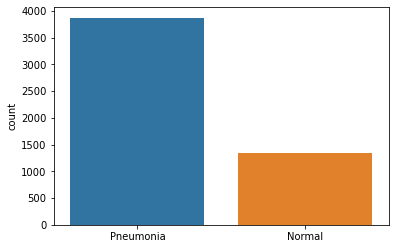

In [9]:
#plot to check the distribution.
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.countplot(l) 

 We can see that we have an imbalanced dataset.Hence,we will be using Data Augmentation to increase the no of training samples.

## Previewing the images of both the classes.

Text(0.5, 1.0, 'NORMAL')

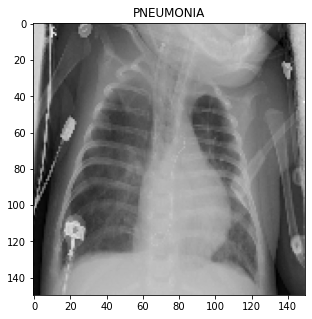

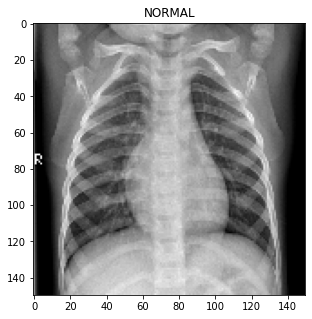

In [10]:
#plot to view images of both Pnumeonia & Normal class.
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

### Data Preparation :
* In image classification we pull in images into an array of numbers. These numbers represent the pixel intensity, and it’s a number between 0 and 255, 255 being white and 0 being black.
### Points to be considered:
* We need to pair the arrays of the image with their labels (if pneumonia or not)
* In a neural net, there’s a lot of math that happens in the backend. If we use numbers like 255 the computer is forced to work with really huge numbers which may increase computational power as well as slow down the epochs. To rectify this we can just divide every pixel by 255 that way we’re left with numbers between 0 and 1, 1 being white and 0 being black.
* Lastly when we feed the images to keras, we need to reshape our dimensions. So we’ll use the x_train.reshape(-1, image_size, image_size, 1). The numbers mean [batch_size, height, width, channels]. The -1 means that the length in the dimension is inferred so we don’t have to specify it. The 1 is because we’re using a black and white picture so we’ll only have one layer image.


In [ ]:
#checking shape of data.
training_set, label = train.__getitem__(0)
print(training_set.shape)

In [12]:
#Pairing the array of the image with their labels(if pneumonia or not):
x_train = []
y_train = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
#print(x_train)
x_val = []
y_val = []    

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

x_test = []
y_test = []    
    
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [13]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [14]:
#Resizing the data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print(x_train[0][0].shape)

(150, 1)



## What is CNN ? 

CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

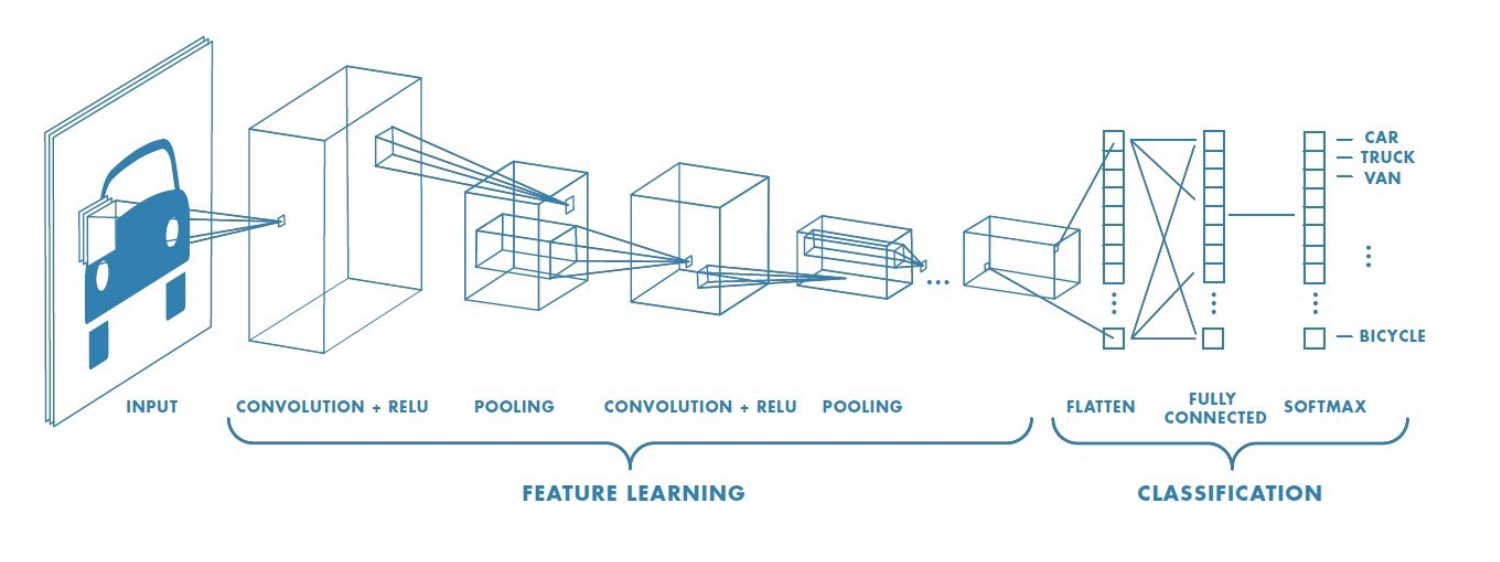

In [15]:
# Build a baseline fully connected model
from keras import models
from keras import layers
#np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(150,150,1))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Fixing data imbalance: Data Augmentation
* We will create duplicates of the images we have by doing certain changes to the images,which can include rotating,flipping,zooming,shifting etc.
* We will not be performing flipping as all the x-Rays will be vertical so doing that might be confusing for the computer.

In [17]:
#To perform the data augmentation, here the ImageDataGenerator class provided by Keras has been initialized. 
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip = True, 
        vertical_flip=False) 
datagen.fit(x_train)

In [18]:
#timing the model:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

### CNN1 with a dropout layer.

In [19]:
#Instantiating the model
model = Sequential()
#Adding the first layer
#Step1: Convolution
model.add(Conv2D(32,(3,3),strides =1,padding='same',activation ='relu',input_shape = (150,150,1)))
#Step2:Pooling
model.add(MaxPool2D((2,2)))

#Adding a second convolutional layer
model.add(Conv2D(64,(3,3),strides =1,padding='same',activation ='relu'))
model.add(Dropout(0.1))
#Poolinh
model.add(MaxPool2D((2,2)))

#Adding a third convolutional layer
model.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
model.add(Dropout(0.3))
#Pooling
model.add(MaxPool2D((2,2)))

#Adding a fourth layer
model.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2)))

#adding a fifth layer
model.add(Conv2D(256,(3,3),strides =1,padding='same',activation ='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2)))

#Step3: Flattening
model.add(Flatten())
model.add(Dense(units =128,activation = 'relu'))
model.add(Dropout(0.3))

#Step4: Full connection
model.add(Dense(units=1,activation ='sigmoid'))
#Compling the CNN
model.compile(optimizer = "adam",loss ='binary_crossentropy',metrics =['accuracy'])
#display model summary.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)      

In [64]:
#Fitting the CNN ro the images using fit_generator
history = model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs =12,validation_data = datagen.flow(x_val,y_val))

# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))                              

Epoch 1/12
163/163 [==============================] - 210s 1s/step - loss: 0.1241 - accuracy: 0.9542 - val_loss: 0.8646 - val_accuracy: 0.6250
Epoch 2/12
163/163 [==============================] - 177s 1s/step - loss: 0.1275 - accuracy: 0.9544 - val_loss: 0.5824 - val_accuracy: 0.6875
Epoch 3/12
163/163 [==============================] - 191s 1s/step - loss: 0.1162 - accuracy: 0.9551 - val_loss: 0.9804 - val_accuracy: 0.6250
Epoch 4/12
163/163 [==============================] - 222s 1s/step - loss: 0.1207 - accuracy: 0.9565 - val_loss: 0.9620 - val_accuracy: 0.5625
Epoch 5/12
163/163 [==============================] - 202s 1s/step - loss: 0.1077 - accuracy: 0.9588 - val_loss: 1.0364 - val_accuracy: 0.5625
Epoch 6/12
163/163 [==============================] - 228s 1s/step - loss: 0.1134 - accuracy: 0.9563 - val_loss: 0.4528 - val_accuracy: 0.6875
Epoch 7/12
163/163 [==============================] - 209s 1s/step - loss: 0.1092 - accuracy: 0.9584 - val_loss: 1.0031 - val_accuracy: 0.6875

In [66]:
#Calculating loss & accuracy of the model.
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 5s 249ms/step - loss: 0.2875 - accuracy: 0.9071
Loss of the model is -  0.28754690289497375
20/20 [==============================] - 5s 228ms/step - loss: 0.2875 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


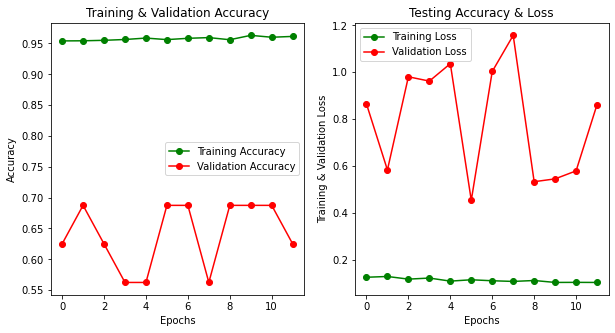

In [67]:
#plotting the Training accuracy and loss
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


Predictions

In [68]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [69]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

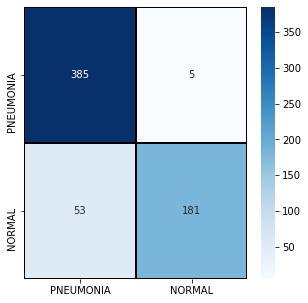

In [70]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [71]:
print(classification_report(y_test,predictions,target_names = ['Pneumonia(class 0)','Normal(Class 1)']))

                    precision    recall  f1-score   support

Pneumonia(class 0)       0.88      0.99      0.93       390
   Normal(Class 1)       0.97      0.77      0.86       234

          accuracy                           0.91       624
         macro avg       0.93      0.88      0.90       624
      weighted avg       0.91      0.91      0.90       624



In [72]:
#save the model
model.save("model.h5")

#### Results:
Model with dropout layers has an accuracy of %, and recall of 99% on Recall.

## Now's let build a CNN without drop out layer:
We want to see how our model behaves without dropout layers.

## CNN2

In [24]:
#Buildign the CNN2 model
model2 = Sequential()
#Adding the first layer
#Step1: Convolution
model2.add(Conv2D(32,(3,3),strides =1,padding='same',activation ='relu',input_shape = (150,150,1)))
#Step2:Pooling
model2.add(MaxPool2D((2,2)))

#Adding a second convolutional layer
model2.add(Conv2D(64,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.2))
#Poolinh
model2.add(MaxPool2D((2,2)))

#Adding a third convolutional layer
model2.add(Conv2D(64,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.3))
#Pooling
model2.add(MaxPool2D((2,2)))

#Adding a fourth convolutional layer
model2.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.3))
#Pooling
model2.add(MaxPool2D((2,2)))

#Adding a fifth convolutional layer
model2.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.3))
#Pooling
model2.add(MaxPool2D((2,2)))

#adding a sixth  layer
model2.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.2))
model2.add(MaxPool2D((2,2)))

#Step3: Flattening
model2.add(Flatten())
model2.add(Dense(units =256,activation = 'relu'))
model2.add(Dropout(0.3))

#Step4: Full connection
model2.add(Dense(units=1,activation ='sigmoid'))
#Compling the CNN
model2.compile(optimizer = "adam",loss ='binary_crossentropy',metrics =['accuracy'])
#display model summary.
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)       

In [25]:
#Fitting the CNN ro the images using fit_generator
history = model2.fit(datagen.flow(x_train,y_train,batch_size=32),epochs =20,validation_data = datagen.flow(x_val,y_val))

# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))     

Epoch 1/20
163/163 [==============================] - 121s 739ms/step - loss: 0.5472 - accuracy: 0.7467 - val_loss: 0.6807 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 114s 699ms/step - loss: 0.4367 - accuracy: 0.7949 - val_loss: 0.6693 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 100s 611ms/step - loss: 0.3764 - accuracy: 0.8370 - val_loss: 0.7191 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 96s 592ms/step - loss: 0.2841 - accuracy: 0.8844 - val_loss: 0.7086 - val_accuracy: 0.7500
Epoch 5/20
163/163 [==============================] - 96s 591ms/step - loss: 0.2357 - accuracy: 0.9061 - val_loss: 0.5760 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 99s 609ms/step - loss: 0.2282 - accuracy: 0.9114 - val_loss: 0.5521 - val_accuracy: 0.6875
Epoch 7/20
163/163 [==============================] - 100s 611ms/step - loss: 0.1847 - accuracy: 0.9271 - val_loss: 1.1265 - va

In [27]:
print("Loss of the model is - " , model2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 206ms/step - loss: 0.3408 - accuracy: 0.9119
Loss of the model is -  0.34082722663879395
20/20 [==============================] - 4s 212ms/step - loss: 0.3408 - accuracy: 0.9119
Accuracy of the model is -  91.18589758872986 %


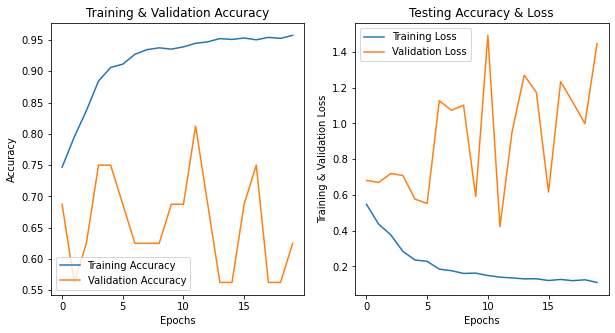

In [28]:
#plotting training& validation accuracy, Traning & validation loss.
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc  , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss  , label = 'Training Loss')
ax[1].plot(epochs , val_loss , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [29]:
predictions = model2.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.88      0.99      0.93       390
   Normal (Class 1)       0.98      0.78      0.87       234

           accuracy                           0.91       624
          macro avg       0.93      0.89      0.90       624
       weighted avg       0.92      0.91      0.91       624



In [31]:
#confusion matrix for CNN model2.
cm = confusion_matrix(y_test,predictions)
cm

array([[386,   4],
       [ 51, 183]])

In [32]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

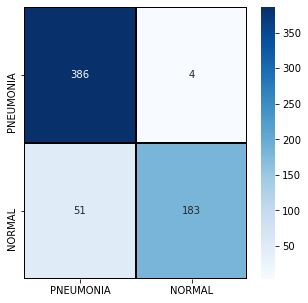

In [33]:
#Plotting confusion matrix.
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [74]:
#save the model
model2.save("model2.h5")

#### Result:
Model2 without dropout layer and 6 convolutional layers has an accuracy of 91%,and a recall of 99% on Pneumonia.The no of false positives in this model is less than the first one.

## Building a CNN3 Model:

### with RMSprop optimizer:

In [49]:
#Buildign the CNN2 model
model3 = Sequential()
#Adding the first layer
#Step1: Convolution
model3.add(Conv2D(32,(3,3),strides =1,padding='same',activation ='relu',input_shape = (150,150,1)))
#Step2:Pooling
model3.add(MaxPool2D((2,2)))

#Adding a second convolutional layer
model3.add(Conv2D(64,(3,3),strides =1,padding='same',activation ='relu'))
#model.add(Dropout(0.2))
#Poolinh
model3.add(MaxPool2D((2,2)))

#Adding a third convolutional layer
model3.add(Conv2D(128,(3,3),strides =1,padding='same',activation ='relu'))
model.add(Dropout(0.3))
#Pooling
model3.add(MaxPool2D((2,2)))

#Step3: Flattening
model3.add(Flatten())
model3.add(Dense(units =256,activation = 'relu'))
model3.add(Dropout(0.3))

#Step4: Full connection
model3.add(Dense(units=1,activation ='sigmoid'))
#Compling the CNN
model3.compile(optimizer = "rmsp",loss ='binary_crossentropy',metrics =['accuracy'])
#display model summary.
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)            

In [50]:
#Fitting the CNN ro the images using fit_generator
history = model3.fit(datagen.flow(x_train,y_train,batch_size=32),epochs =20,validation_data = datagen.flow(x_val,y_val))

# end timer
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))        

Epoch 1/20
163/163 [==============================] - 136s 833ms/step - loss: 0.4969 - accuracy: 0.7697 - val_loss: 1.0052 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 145s 887ms/step - loss: 0.3099 - accuracy: 0.8625 - val_loss: 1.0414 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 186s 1s/step - loss: 0.2629 - accuracy: 0.8825 - val_loss: 1.1217 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 180s 1s/step - loss: 0.2477 - accuracy: 0.8961 - val_loss: 1.3339 - val_accuracy: 0.6875
Epoch 5/20
163/163 [==============================] - 145s 892ms/step - loss: 0.2159 - accuracy: 0.9158 - val_loss: 0.9723 - val_accuracy: 0.6250
Epoch 6/20
163/163 [==============================] - 167s 1s/step - loss: 0.2008 - accuracy: 0.9170 - val_loss: 1.0200 - val_accuracy: 0.5625
Epoch 7/20
163/163 [==============================] - 170s 1s/step - loss: 0.1906 - accuracy: 0.9252 - val_loss: 1.5594 - val_accurac

In [51]:
#Evaluate on test:
print("Loss of the model is - " , model3.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model3.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 190ms/step - loss: 0.2281 - accuracy: 0.9231
Loss of the model is -  0.22807727754116058
20/20 [==============================] - 4s 187ms/step - loss: 0.2281 - accuracy: 0.9231
Accuracy of the model is -  92.30769276618958 %


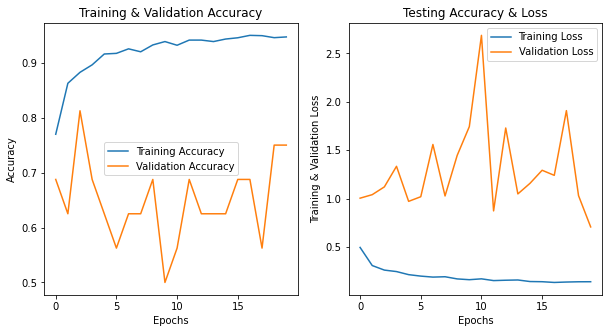

In [52]:
#plotting training& validation accuracy, Traning & validation loss.
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc  , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss  , label = 'Training Loss')
ax[1].plot(epochs , val_loss , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [53]:
#Printing classification report.
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.88      0.99      0.93       390
   Normal (Class 1)       0.98      0.78      0.87       234

           accuracy                           0.91       624
          macro avg       0.93      0.89      0.90       624
       weighted avg       0.92      0.91      0.91       624



In [54]:
#confusion matrix for CNN model3.
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

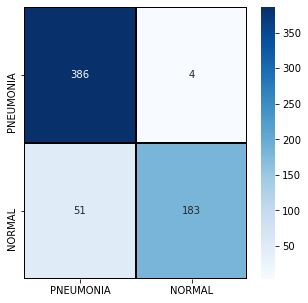

In [55]:
#Plotting confusion matrix.
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [73]:
#save the model
model3.save("model3.h5")

#### Results:

#### Comparing scores of the models.

In [61]:
model_scores_combined = {'CNN_model': 91.98, 'CNN_model2': 91, 'CNN_model3' : 91}

In [62]:
model_scores = pd.Series(model_scores_combined)

In [63]:
model_scores

CNN_model     91.98
CNN_model2    91.00
CNN_model3    91.00
dtype: float64

In [ ]:
Since,recall scores are same for all the models,CNN_Model1 is our best performing model with an accuracy of 91.98%.

### Conclusion:

1. Activation function used was Relu throughout except for the last layer Sigmoid was used as it is a binary classsification problem.
2. Dropout layers have been added to reduce overfitting.
3. Optimizer for the first 2 models is 'adam', for the last model3 'rmsprop' has been used.
4. Loss function used is binary_crossentropy.
5. Max no of epochs used is 20, with batch size of 32.

### Future Improvements

1. Training selected models with a a higher no of epochs to try to reach convergence.

2. Gathering more data for a better model.

3. Testing this data on different pretrained models would lead to significant improvement.

4. This work can be extended to detect and classify X-Ray images with lung cancer & Pneumonia.
5. If model’s recall and accuracy scores are good it can surely help in reducing patient wait times.